# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading the CSV Dataset

In [2]:
df = pd.read_csv("CVD_cleaned.csv")

In [3]:
df

,General_Health,Checkup,Exercise,Heart_Disease(target),Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25359,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,175,58.97,19.20,No,1,30,4,8
25360,Good,5 or more years ago,Yes,No,No,No,Yes,No,No,Female,157,49.90,20.12,No,5,60,60,1
25361,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,165,54.43,19.97,No,8,8,12,12
25362,Good,Within the past year,Yes,No,No,Yes,Yes,No,No,Female,157,81.65,32.92,No,0,60,8,0


# Observing Unique Value Count for each Column

In [4]:
for col in df:
    print(df[col].value_counts())
    print()
    print("-"*50)
    print()

General_Health
Very Good    8410
Good         7977
Excellent    4585
Fair         3271
Poor         1118
Poo             3
Name: count, dtype: int64

--------------------------------------------------

Checkup
Within the past year       18713
Within the past 2 years     3493
Within the past 5 years     1752
5 or more years ago         1248
Never                        158
Name: count, dtype: int64

--------------------------------------------------

Exercise
Yes    19546
No      5818
Name: count, dtype: int64

--------------------------------------------------

Heart_Disease(target)
No     23151
Yes     2213
Name: count, dtype: int64

--------------------------------------------------

Skin_Cancer
No     22457
Yes     2907
Name: count, dtype: int64

--------------------------------------------------

Other_Cancer
No     22828
Yes     2536
Name: count, dtype: int64

--------------------------------------------------

Depression
No     20678
Yes     4686
Name: count, dtype: int64

------

# Dropping FriedPotato_Consumption Column 

In [5]:
df.drop("FriedPotato_Consumption", axis=1, inplace=True)

In [6]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption
count,25364.000000,25364.000000,25364.000000,25364.000000,25364.000000,25364.000000
mean,170.438180,82.459508,28.313264,4.970785,29.726384,15.393668
std,10.781625,20.730211,6.395843,8.294712,25.013853,14.995525
min,97.000000,25.400000,12.160000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.030000,0.000000,12.000000,4.000000
50%,170.000000,79.380000,27.320000,1.000000,30.000000,12.000000
75%,178.000000,92.990000,31.460000,5.000000,30.000000,20.000000
max,234.000000,235.870000,89.100000,30.000000,120.000000,120.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25364 entries, 0 to 25363
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                25364 non-null  object 
 1   Checkup                       25364 non-null  object 
 2   Exercise                      25364 non-null  object 
 3   Heart_Disease(target)         25364 non-null  object 
 4   Skin_Cancer                   25364 non-null  object 
 5   Other_Cancer                  25364 non-null  object 
 6   Depression                    25364 non-null  object 
 7   Diabetes                      25364 non-null  object 
 8   Arthritis                     25364 non-null  object 
 9   Sex                           25364 non-null  object 
 10  Height_(cm)                   25364 non-null  int64  
 11  Weight_(kg)                   25364 non-null  float64
 12  BMI                           25364 non-null  float64
 13  S

# Separating Numerical and Categorical Columns

In [8]:
numerical = []
categorical = []

In [9]:
for col in df:
    if df.dtypes[col] == object:
        categorical.append(col)
        
    else:
        numerical.append(col)

In [10]:
categorical 

['General_Health',
 'Checkup',
 'Exercise',
 'Heart_Disease(target)',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Smoking_History']

In [11]:
numerical

['Height_(cm)',
 'Weight_(kg)',
 'BMI',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption']

# Plotting displot

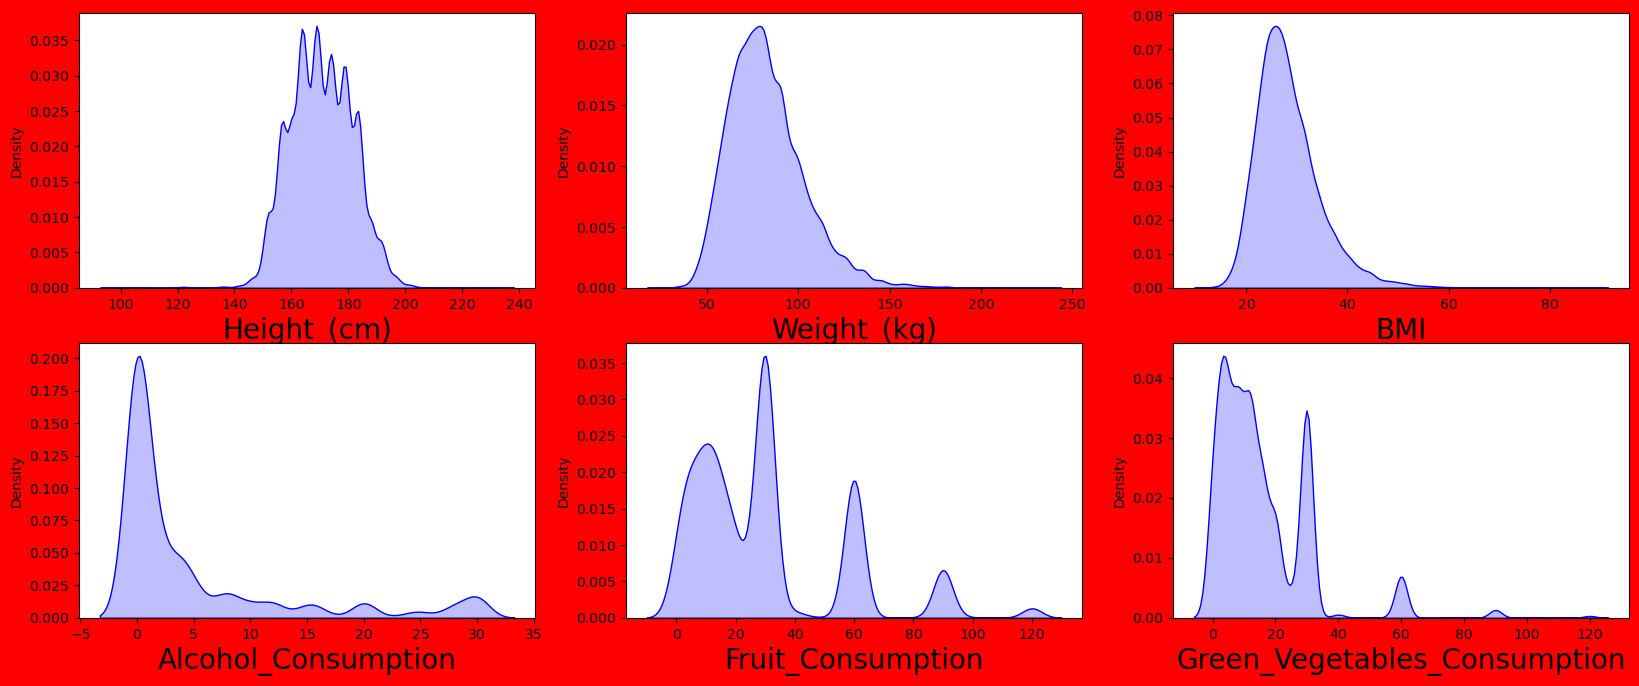

In [12]:
plt.figure(figsize=(20,25), facecolor='Red')
plotnumber =1
for column in numerical:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column], color='b',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [13]:
for col in numerical:
    print(col," :",df[column].skew())

Height_(cm)  : 2.2595978179982743
Weight_(kg)  : 2.2595978179982743
BMI  : 2.2595978179982743
Alcohol_Consumption  : 2.2595978179982743
Fruit_Consumption  : 2.2595978179982743
Green_Vegetables_Consumption  : 2.2595978179982743


# Handling Skewness

In [14]:
for col in numerical:
    df[col+"_log"] = np.log(df[col] + 1)
    print(col+"_log"," :",df[col+"_log"].skew())

Height_(cm)_log  : -0.20289088585585133
Weight_(kg)_log  : 0.16246570214713568
BMI_log  : 0.4698696134453316
Alcohol_Consumption_log  : 0.7361371819372567
Fruit_Consumption_log  : -0.8323122118497204
Green_Vegetables_Consumption_log  : -0.6278244090734865


In [15]:
fc = np.sqrt(df["Fruit_Consumption_log"])
fc = np.sqrt(fc)
# fc = np.log(fc+1)
print(fc.skew())

-4.259290164875163


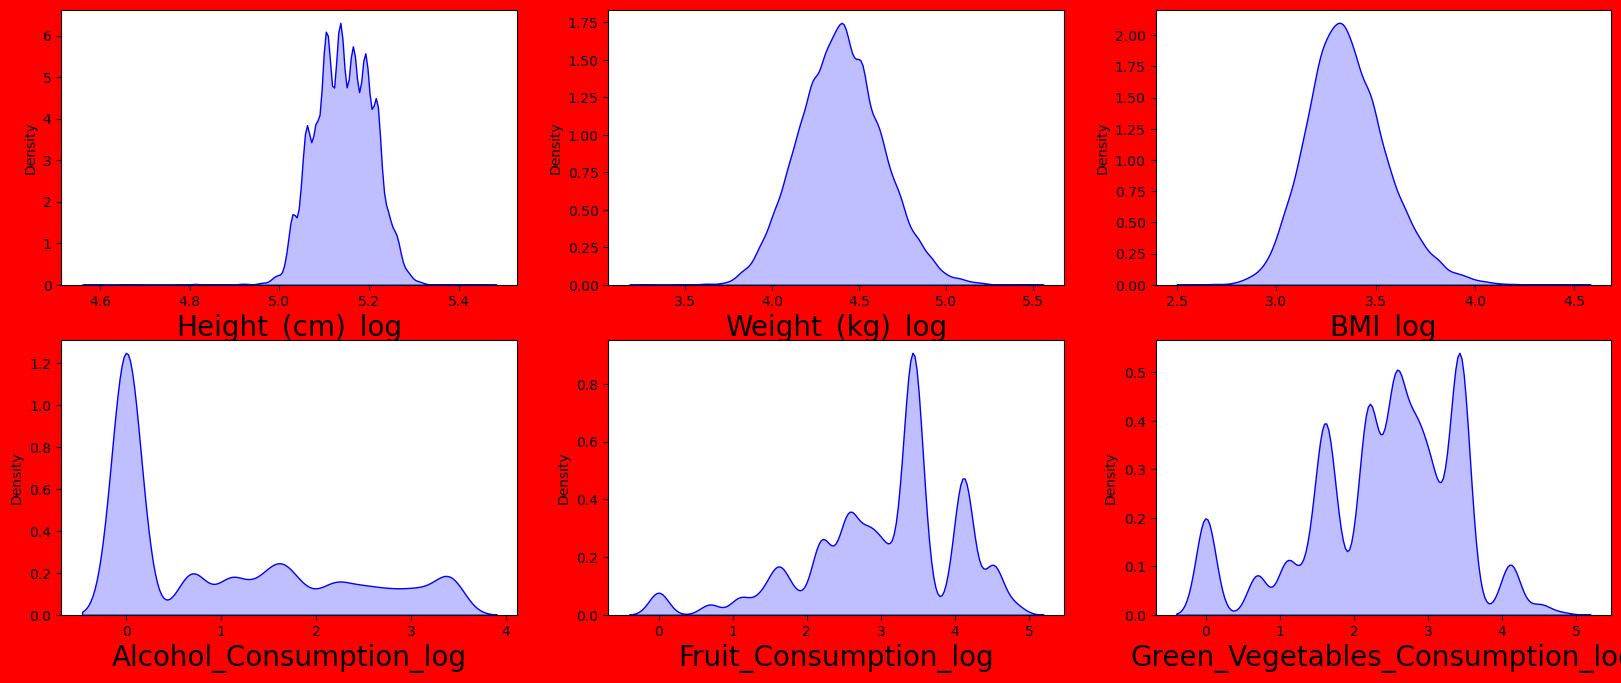

In [16]:
plt.figure(figsize=(20,25), facecolor='Red')
plotnumber =1
for column in numerical:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column+"_log"], color='b',hist=False,kde_kws={"shade": True})
        plt.xlabel(column+"_log",fontsize=20)
    plotnumber+=1
plt.show()

# Dropping original Columns and updating Numerical List

In [17]:
df.drop(numerical, axis=1, inplace=True)

In [18]:
i = 0
for col in numerical:
    numerical[i] = col+"_log"
    i += 1

# Plotting the box plot

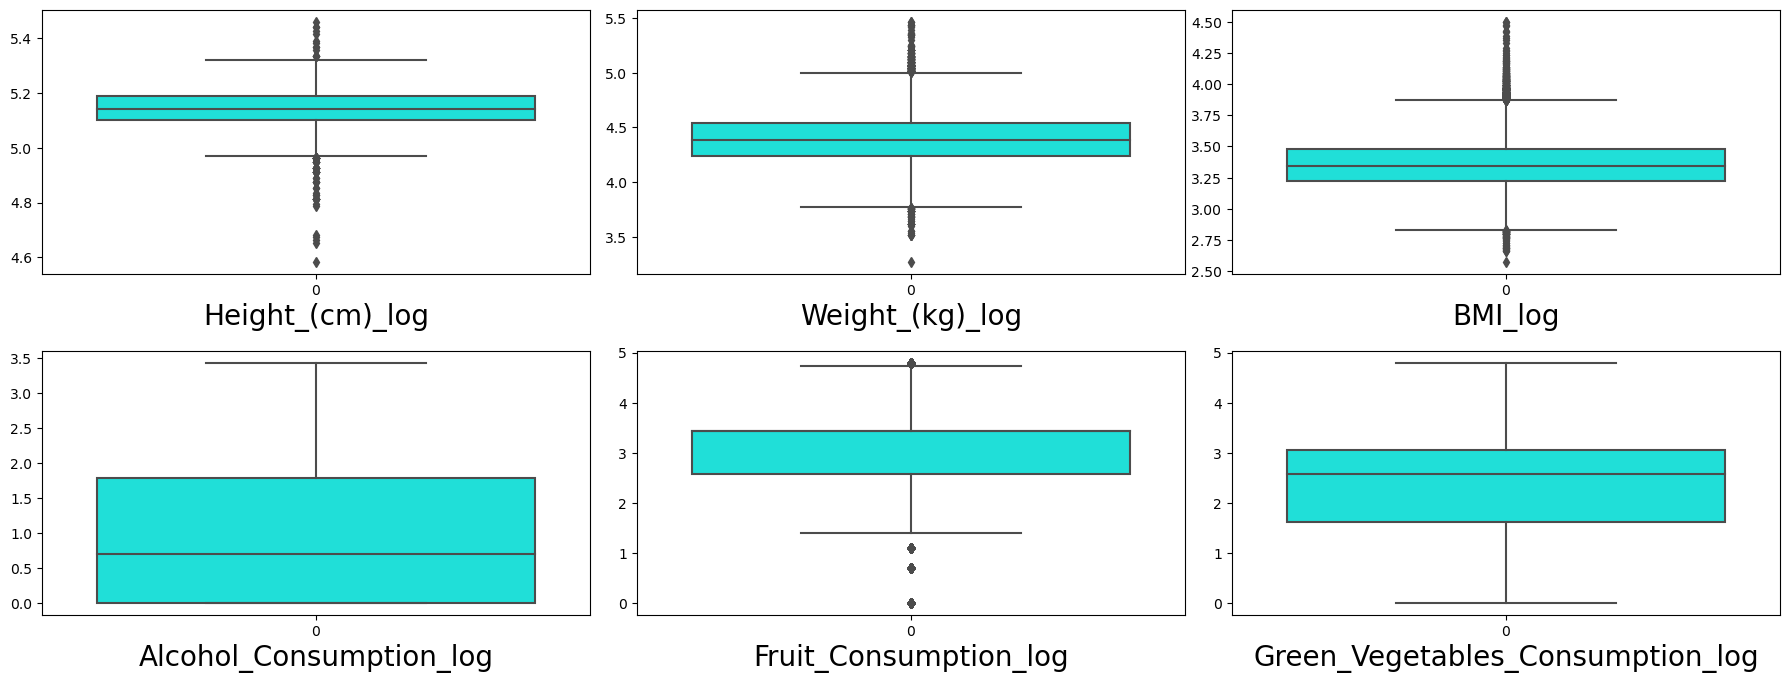

In [19]:
plt.figure(figsize=(18,20), facecolor='white')
plotnumber =1
for column in numerical:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Treating Outliers 

# By Using IQR

In [20]:
# Finding q1(25% data) for all numerical columns

In [21]:
q1 = df[numerical].quantile(0.25)
q1

Height_(cm)_log                     5.099866
Weight_(kg)_log                     4.234686
BMI_log                             3.220075
Alcohol_Consumption_log             0.000000
Fruit_Consumption_log               2.564949
Green_Vegetables_Consumption_log    1.609438
Name: 0.25, dtype: float64

In [22]:
# Finding q3(75% data) for all numerical columns

In [23]:
q3 = df[numerical].quantile(0.75)
q3

Height_(cm)_log                     5.187386
Weight_(kg)_log                     4.543188
BMI_log                             3.480009
Alcohol_Consumption_log             1.791759
Fruit_Consumption_log               3.433987
Green_Vegetables_Consumption_log    3.044522
Name: 0.75, dtype: float64

In [24]:
#Finding IQR

In [25]:
iqr = q3 - q1
iqr

Height_(cm)_log                     0.087519
Weight_(kg)_log                     0.308502
BMI_log                             0.259933
Alcohol_Consumption_log             1.791759
Fruit_Consumption_log               0.869038
Green_Vegetables_Consumption_log    1.435085
dtype: float64

In [26]:
Height_high = q3["Height_(cm)_log"] + 1.5 * iqr["Height_(cm)_log"]
Height_low = q1["Height_(cm)_log"] - 1.5 * iqr["Height_(cm)_log"]
Weight_high = q3["Weight_(kg)_log"] + 1.5 * iqr["Weight_(kg)_log"]
Weight_low = q1["Weight_(kg)_log"] - 1.5 * iqr["Weight_(kg)_log"]
BMI_high = q3.BMI_log + 1.5 * iqr.BMI_log
BMI_low = q1.BMI_log - 1.5 * iqr.BMI_log
Alcohol_Consumption_high = q3.Alcohol_Consumption_log + 1.5 * iqr.Alcohol_Consumption_log
Alcohol_Consumption_low = q1.Alcohol_Consumption_log - 1.5 * iqr.Alcohol_Consumption_log
Fruit_Consumption_high = q3.Fruit_Consumption_log + 1.5 * iqr.Fruit_Consumption_log
Fruit_Consumption_low = q1.Fruit_Consumption_log - 1.5 * iqr.Fruit_Consumption_log
Green_Vegetables_Consumption_high = q3.Green_Vegetables_Consumption_log + 1.5 * iqr.Green_Vegetables_Consumption_log
Green_Vegetables_Consumption_low = q1.Green_Vegetables_Consumption_log - 1.5 * iqr.Green_Vegetables_Consumption_log

In [27]:
high = [Height_high,Weight_high,BMI_high,Alcohol_Consumption_high,Fruit_Consumption_high,Green_Vegetables_Consumption_high]
low = [Height_low,Weight_low,BMI_low,Alcohol_Consumption_low,Fruit_Consumption_low,Green_Vegetables_Consumption_low]

In [28]:
index_high = []
index_low = []

In [29]:
i = 0
for col in numerical:
    high_arr = np.where(df[col] > high[i])
    tup_high_arr = tuple(map(tuple, high_arr))
    for j in tup_high_arr[0]:
        if j not in index_high:
            index_high.append(j)
    
    low_arr = np.where(df[col] < low[i])
    tup_low_arr = tuple(map(tuple, low_arr))  
    for j in tup_low_arr[0]:
        if j not in index_low:
            index_low.append(j)  
    i += 1


In [30]:
len(index_low + index_high)

2242

In [31]:
df1 = df.drop(df.index[index_high])

In [32]:
df1 = df.drop(df.index[index_low])

In [33]:
df1.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease(target),Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,Height_(cm)_log,Weight_(kg)_log,BMI_log,Alcohol_Consumption_log,Fruit_Consumption_log,Green_Vegetables_Consumption_log
0,1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,No,5.111988,4.358118,3.377246,0.000000,3.433987,0.000000
1,2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,No,5.099866,4.493680,3.540089,1.609438,2.564949,1.386294
2,3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,No,5.198497,4.547965,3.392157,0.000000,3.433987,3.433987
3,4,Good,Within the past year,No,No,No,No,No,No,No,Male,Yes,5.257495,4.493680,3.233567,0.000000,2.197225,1.609438
4,5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,No,5.214936,5.044843,3.852485,0.000000,2.564949,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23820,25359,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,No,5.170484,4.093844,3.005683,0.693147,3.433987,1.609438
23821,25360,Good,5 or more years ago,Yes,No,No,No,Yes,No,No,Female,No,5.062595,3.929863,3.050220,1.791759,4.110874,4.110874
23822,25361,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,No,5.111988,4.015121,3.043093,2.197225,2.197225,2.564949
23823,25362,Good,Within the past year,Yes,No,No,Yes,Yes,No,No,Female,No,5.062595,4.414615,3.524005,0.000000,4.110874,2.197225


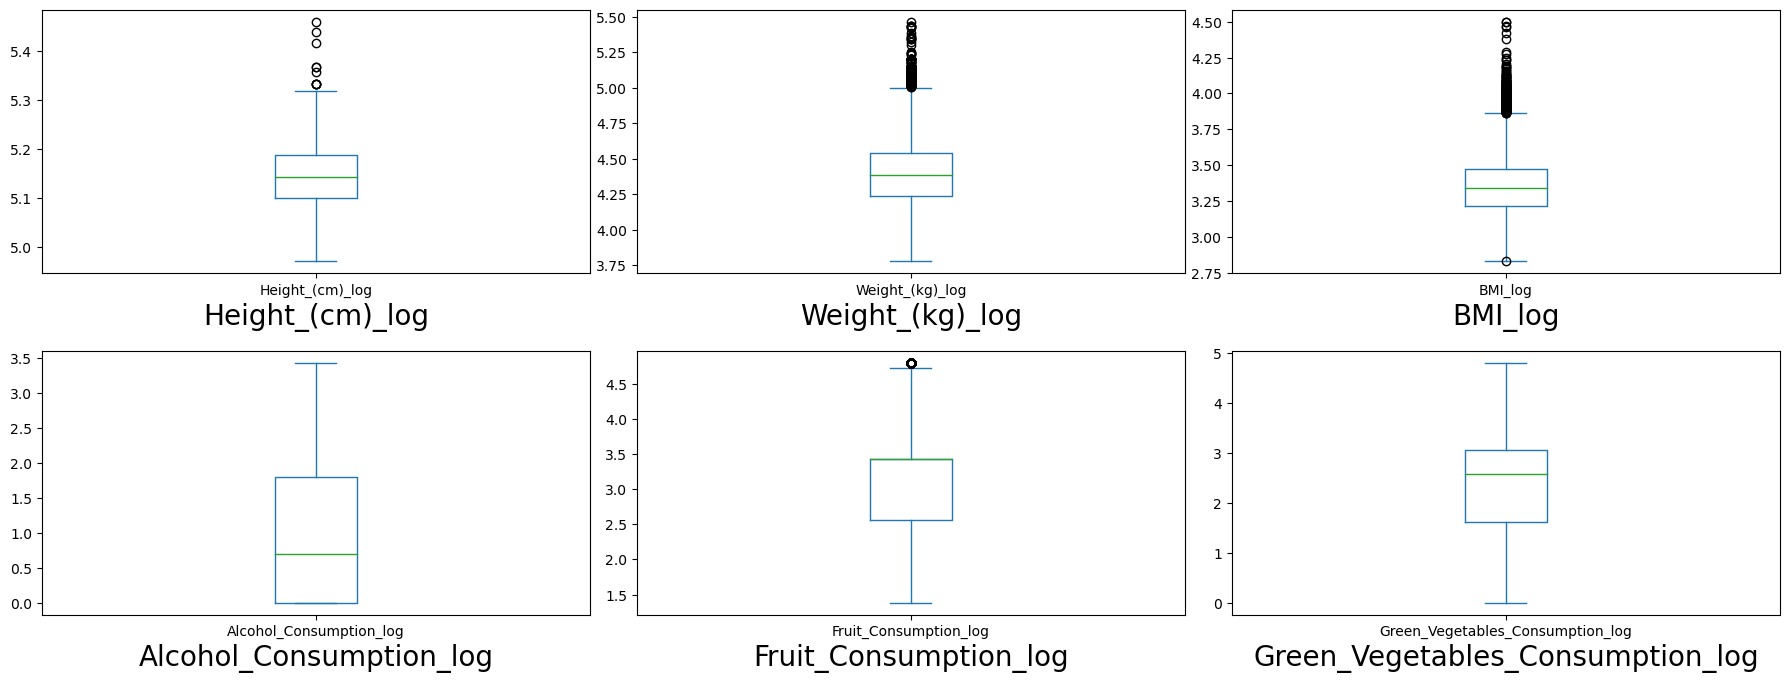

In [34]:
plt.figure(figsize=(18,20), facecolor='white')
plotnumber =1
for column in numerical:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        df1[column].plot(kind = "box")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

# df1["Alcohol_Consumption_log"].plot(kind = "box")
# plt.show()

In [35]:
q1 = df1[numerical].quantile(0.25)
q1

Height_(cm)_log                     5.099866
Weight_(kg)_log                     4.234686
BMI_log                             3.220075
Alcohol_Consumption_log             0.000000
Fruit_Consumption_log               2.564949
Green_Vegetables_Consumption_log    1.609438
Name: 0.25, dtype: float64

In [36]:
q3 = df1[numerical].quantile(0.75)
q3

Height_(cm)_log                     5.187386
Weight_(kg)_log                     4.543188
BMI_log                             3.477541
Alcohol_Consumption_log             1.791759
Fruit_Consumption_log               3.433987
Green_Vegetables_Consumption_log    3.044522
Name: 0.75, dtype: float64

In [37]:
iqr = q3 - q1
iqr

Height_(cm)_log                     0.087519
Weight_(kg)_log                     0.308502
BMI_log                             0.257466
Alcohol_Consumption_log             1.791759
Fruit_Consumption_log               0.869038
Green_Vegetables_Consumption_log    1.435085
dtype: float64

In [38]:
Height_high = q3["Height_(cm)_log"] + 1.5 * iqr["Height_(cm)_log"]
Weight_high = q3["Weight_(kg)_log"] + 1.5 * iqr["Weight_(kg)_log"]
BMI_high = q3["BMI_log"] + 1.5 * iqr["BMI_log"]
high = [Height_high,Weight_high,BMI_high]

In [39]:
index_high = []
i = 0
for col in numerical:
    if i == 3:
        break
    high_arr = np.where(df1[col] > high[i])
    tup_high_arr = tuple(map(tuple, high_arr))
    for j in tup_high_arr[0]:
        if j not in index_high:
            index_high.append(j)

In [40]:
df2 = df1.drop(df1.index[index_high])

In [41]:
df2.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease(target),Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,Height_(cm)_log,Weight_(kg)_log,BMI_log,Alcohol_Consumption_log,Fruit_Consumption_log,Green_Vegetables_Consumption_log
0,1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,No,5.111988,4.358118,3.377246,0.000000,3.433987,0.000000
1,2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,No,5.099866,4.493680,3.540089,1.609438,2.564949,1.386294
2,3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,No,5.198497,4.547965,3.392157,0.000000,3.433987,3.433987
3,4,Good,Within the past year,No,No,No,No,No,No,No,Male,Yes,5.257495,4.493680,3.233567,0.000000,2.197225,1.609438
4,5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,No,5.214936,5.044843,3.852485,0.000000,2.564949,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23796,25359,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,No,5.170484,4.093844,3.005683,0.693147,3.433987,1.609438
23797,25360,Good,5 or more years ago,Yes,No,No,No,Yes,No,No,Female,No,5.062595,3.929863,3.050220,1.791759,4.110874,4.110874
23798,25361,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,No,5.111988,4.015121,3.043093,2.197225,2.197225,2.564949
23799,25362,Good,Within the past year,Yes,No,No,Yes,Yes,No,No,Female,No,5.062595,4.414615,3.524005,0.000000,4.110874,2.197225


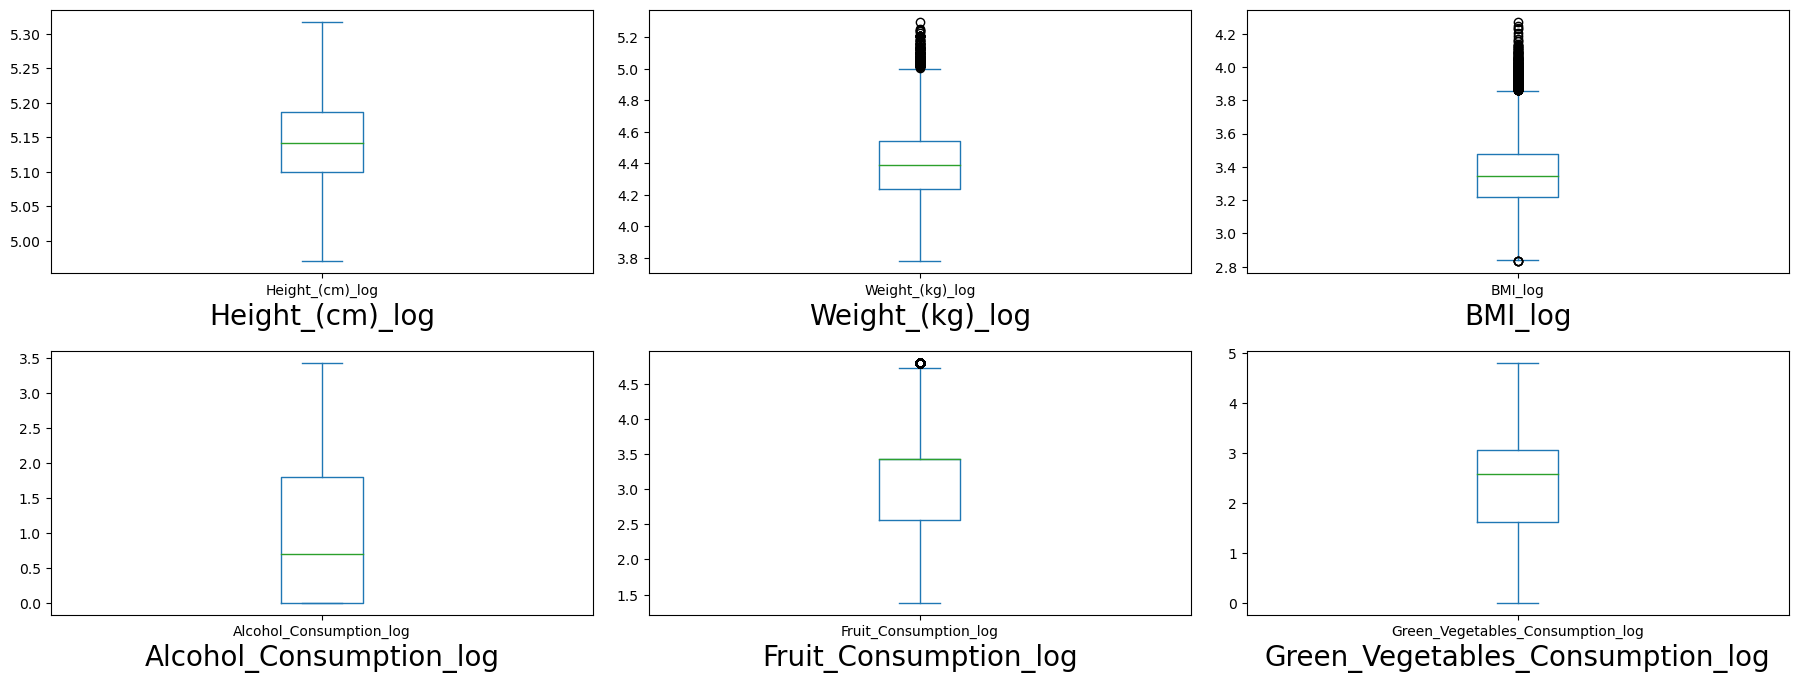

In [42]:
plt.figure(figsize=(18,20), facecolor='white')
plotnumber =1
for column in numerical:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        df2[column].plot(kind = "box")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [43]:
q1 = df2[numerical].quantile(0.25)
q3 = df2[numerical].quantile(0.75)
iqr = q3 - q1
Weight_high = q3["Weight_(kg)_log"] + 1.5 * iqr["Weight_(kg)_log"]

In [44]:
index_high = np.where(df2["Weight_(kg)_log"] > Weight_high)

In [45]:
df3 = df2.drop(df2.index[index_high])

In [46]:
df3.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease(target),Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,Height_(cm)_log,Weight_(kg)_log,BMI_log,Alcohol_Consumption_log,Fruit_Consumption_log,Green_Vegetables_Consumption_log
0,1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,No,5.111988,4.358118,3.377246,0.000000,3.433987,0.000000
1,2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,No,5.099866,4.493680,3.540089,1.609438,2.564949,1.386294
2,3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,No,5.198497,4.547965,3.392157,0.000000,3.433987,3.433987
3,4,Good,Within the past year,No,No,No,No,No,No,No,Male,Yes,5.257495,4.493680,3.233567,0.000000,2.197225,1.609438
4,6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,Yes,5.170484,4.260565,3.167161,0.000000,2.833213,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23638,25359,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,No,5.170484,4.093844,3.005683,0.693147,3.433987,1.609438
23639,25360,Good,5 or more years ago,Yes,No,No,No,Yes,No,No,Female,No,5.062595,3.929863,3.050220,1.791759,4.110874,4.110874
23640,25361,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,No,5.111988,4.015121,3.043093,2.197225,2.197225,2.564949
23641,25362,Good,Within the past year,Yes,No,No,Yes,Yes,No,No,Female,No,5.062595,4.414615,3.524005,0.000000,4.110874,2.197225


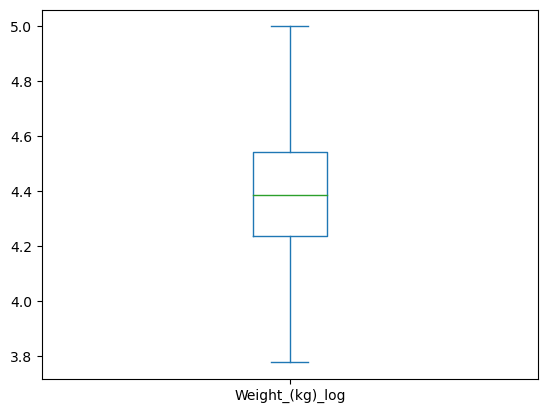

In [47]:
df3["Weight_(kg)_log"].plot(kind = "box")
plt.show()

In [48]:
q1 = df3[numerical].quantile(0.25)
q3 = df3[numerical].quantile(0.75)
iqr = q3 - q1
BMI_high = q3["BMI_log"] + 1.5 * iqr["BMI_log"]
index_high = np.where(df3["BMI_log"] > Weight_high)
df4 = df3.drop(df3.index[index_high])
df4.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease(target),Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,Height_(cm)_log,Weight_(kg)_log,BMI_log,Alcohol_Consumption_log,Fruit_Consumption_log,Green_Vegetables_Consumption_log
0,1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,No,5.111988,4.358118,3.377246,0.000000,3.433987,0.000000
1,2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,No,5.099866,4.493680,3.540089,1.609438,2.564949,1.386294
2,3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,No,5.198497,4.547965,3.392157,0.000000,3.433987,3.433987
3,4,Good,Within the past year,No,No,No,No,No,No,No,Male,Yes,5.257495,4.493680,3.233567,0.000000,2.197225,1.609438
4,6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,Yes,5.170484,4.260565,3.167161,0.000000,2.833213,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23638,25359,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,No,5.170484,4.093844,3.005683,0.693147,3.433987,1.609438
23639,25360,Good,5 or more years ago,Yes,No,No,No,Yes,No,No,Female,No,5.062595,3.929863,3.050220,1.791759,4.110874,4.110874
23640,25361,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,No,5.111988,4.015121,3.043093,2.197225,2.197225,2.564949
23641,25362,Good,Within the past year,Yes,No,No,Yes,Yes,No,No,Female,No,5.062595,4.414615,3.524005,0.000000,4.110874,2.197225


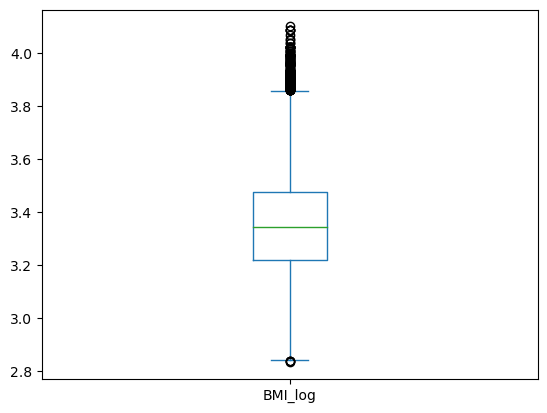

In [49]:
df4["BMI_log"].plot(kind = "box")
plt.show()

# Label Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
lab_enc = LabelEncoder()

In [52]:
for col in categorical:
    df4[col] = lab_enc.fit_transform(df4[col])

In [53]:
df4

,General_Health,Checkup,Exercise,Heart_Disease(target),Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,Height_(cm)_log,Weight_(kg)_log,BMI_log,Alcohol_Consumption_log,Fruit_Consumption_log,Green_Vegetables_Consumption_log
1,5,4,0,1,0,0,0,2,0,0,0,5.111988,4.358118,3.377246,0.000000,3.433987,0.000000
2,5,4,1,0,0,0,0,2,0,0,0,5.099866,4.493680,3.540089,1.609438,2.564949,1.386294
3,4,4,1,1,0,0,0,2,0,1,0,5.198497,4.547965,3.392157,0.000000,3.433987,3.433987
4,2,4,0,0,0,0,0,0,0,1,1,5.257495,4.493680,3.233567,0.000000,2.197225,1.609438
6,1,4,1,1,0,0,0,0,1,1,1,5.170484,4.260565,3.167161,0.000000,2.833213,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25359,0,4,1,0,0,0,0,0,0,0,0,5.170484,4.093844,3.005683,0.693147,3.433987,1.609438
25360,2,0,1,0,0,0,1,0,0,0,0,5.062595,3.929863,3.050220,1.791759,4.110874,4.110874
25361,5,4,1,0,0,0,0,0,0,0,0,5.111988,4.015121,3.043093,2.197225,2.197225,2.564949
25362,2,4,1,0,0,1,1,0,0,0,0,5.062595,4.414615,3.524005,0.000000,4.110874,2.197225


# Checking the correlation of the columns

In [54]:
df4.corr()

,General_Health,Checkup,Exercise,Heart_Disease(target),Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,Height_(cm)_log,Weight_(kg)_log,BMI_log,Alcohol_Consumption_log,Fruit_Consumption_log,Green_Vegetables_Consumption_log
General_Health,1.000000,0.018370,0.033490,-0.017824,0.036612,0.022177,-0.006544,-0.039655,0.015010,-0.011895,0.000705,0.007703,0.004092,-0.000215,0.056558,-0.007742,0.012377
Checkup,0.018370,1.000000,-0.036062,0.086374,0.093222,0.087850,0.048061,0.127810,0.166315,-0.099433,-0.009883,-0.075690,0.018986,0.068400,-0.052742,0.037516,0.045793
Exercise,0.033490,-0.036062,1.000000,-0.103110,-0.007823,-0.055138,-0.080145,-0.143424,-0.128187,0.078608,-0.095868,0.094621,-0.065730,-0.133965,0.146915,0.137370,0.161848
Heart_Disease(target),-0.017824,0.086374,-0.103110,1.000000,0.100795,0.087950,0.038890,0.167592,0.160518,0.067262,0.109874,0.027942,0.049853,0.040231,-0.071991,-0.015108,-0.034383
Skin_Cancer,0.036612,0.093222,-0.007823,0.100795,1.000000,0.141574,-0.001991,0.025071,0.159530,0.011104,0.046375,0.020435,-0.014848,-0.029978,0.017874,0.018485,0.029796
Other_Cancer,0.022177,0.087850,-0.055138,0.087950,0.141574,1.000000,0.008286,0.059347,0.142568,-0.052645,0.051543,-0.042351,-0.030683,-0.009534,-0.027493,0.003604,0.000688
Depression,-0.006544,0.048061,-0.080145,0.038890,-0.001991,0.008286,1.000000,0.054373,0.138762,-0.123966,0.101138,-0.079081,0.033721,0.087867,-0.026062,-0.039258,-0.054363
Diabetes,-0.039655,0.127810,-0.143424,0.167592,0.025071,0.059347,0.054373,1.000000,0.127493,-0.022993,0.045020,-0.057216,0.145523,0.203068,-0.155684,-0.012681,-0.036773
Arthritis,0.015010,0.166315,-0.128187,0.160518,0.159530,0.142568,0.138762,0.127493,1.000000,-0.109491,0.138857,-0.093129,0.062205,0.128878,-0.072799,-0.013748,-0.020452
Sex,-0.011895,-0.099433,0.078608,0.067262,0.011104,-0.052645,-0.123966,-0.022993,-0.109491,1.000000,0.095368,0.704426,0.385406,0.011489,0.131098,-0.075080,-0.055459


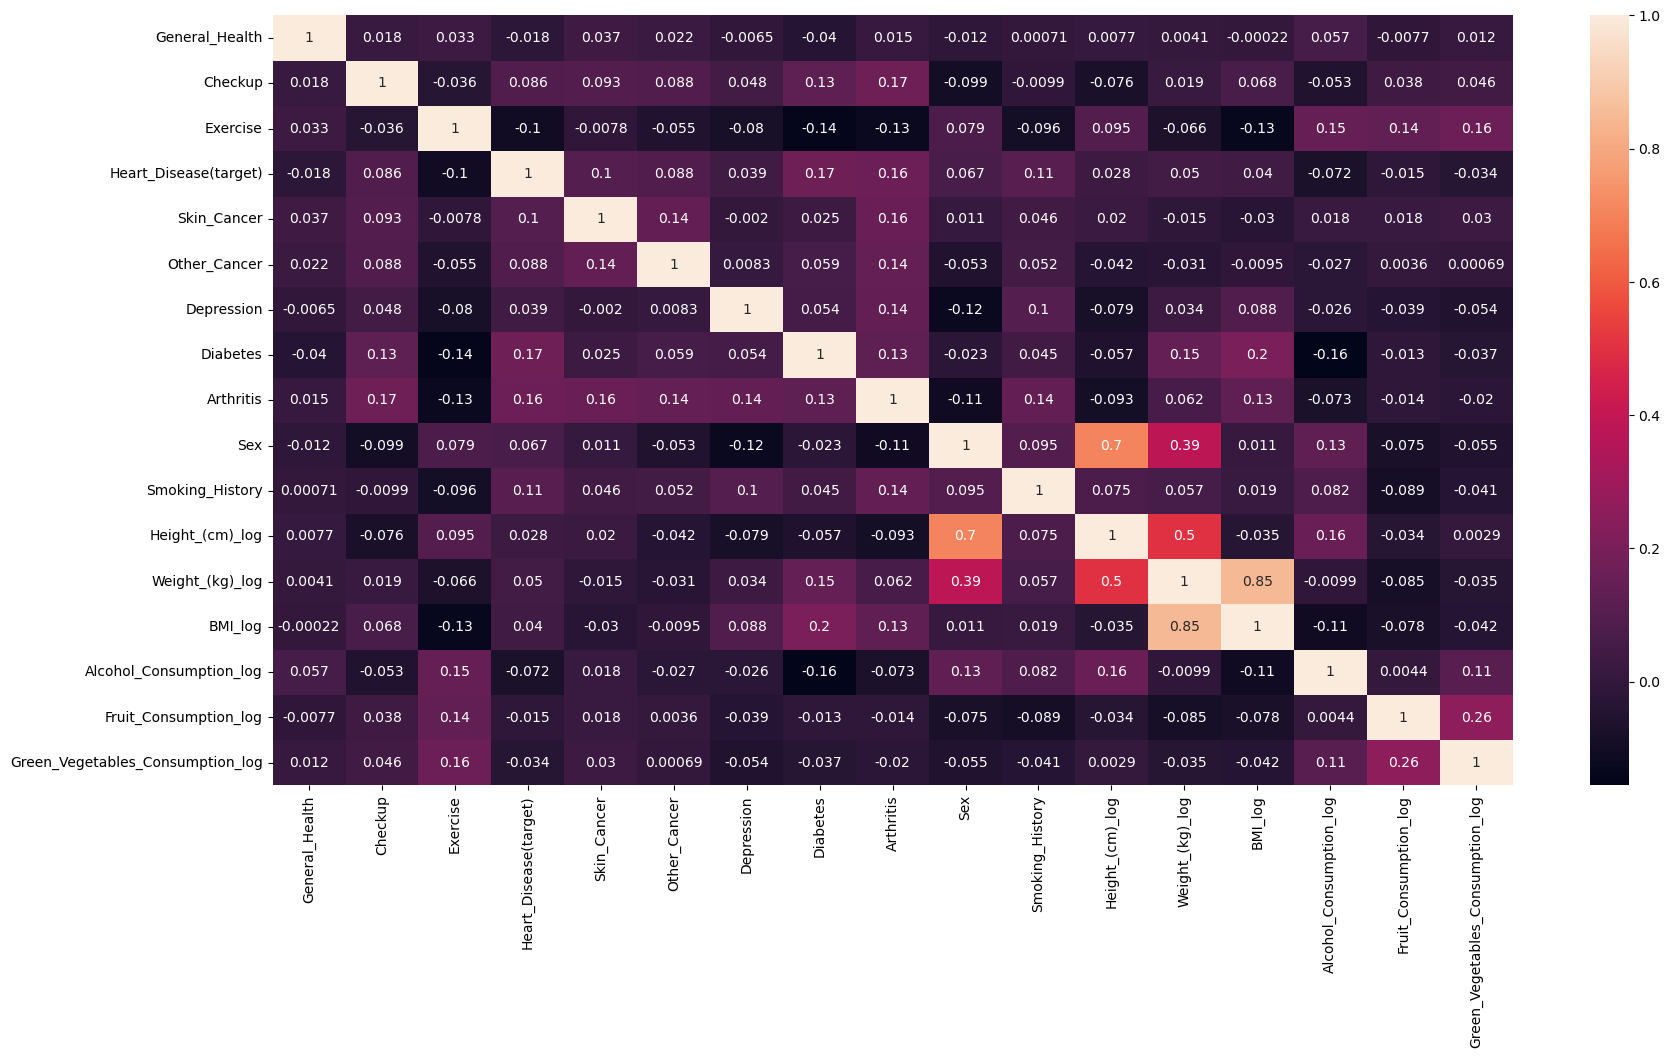

In [55]:
plt.figure(figsize=(20, 10))
sns.heatmap(df4.corr(), annot=True)
plt.show()

# Checking for Multicollinearlity

In [56]:
vif_x = df4.drop("Heart_Disease(target)", axis=1)
Y = df4["Heart_Disease(target)"]

In [57]:
vif_x

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,Height_(cm)_log,Weight_(kg)_log,BMI_log,Alcohol_Consumption_log,Fruit_Consumption_log,Green_Vegetables_Consumption_log
1,5,4,0,0,0,0,2,0,0,0,5.111988,4.358118,3.377246,0.000000,3.433987,0.000000
2,5,4,1,0,0,0,2,0,0,0,5.099866,4.493680,3.540089,1.609438,2.564949,1.386294
3,4,4,1,0,0,0,2,0,1,0,5.198497,4.547965,3.392157,0.000000,3.433987,3.433987
4,2,4,0,0,0,0,0,0,1,1,5.257495,4.493680,3.233567,0.000000,2.197225,1.609438
6,1,4,1,0,0,0,0,1,1,1,5.170484,4.260565,3.167161,0.000000,2.833213,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25359,0,4,1,0,0,0,0,0,0,0,5.170484,4.093844,3.005683,0.693147,3.433987,1.609438
25360,2,0,1,0,0,1,0,0,0,0,5.062595,3.929863,3.050220,1.791759,4.110874,4.110874
25361,5,4,1,0,0,0,0,0,0,0,5.111988,4.015121,3.043093,2.197225,2.197225,2.564949
25362,2,4,1,0,1,1,0,0,0,0,5.062595,4.414615,3.524005,0.000000,4.110874,2.197225


In [58]:
Y

1        1
2        0
3        1
4        0
6        1
        ..
25359    0
25360    0
25361    0
25362    0
25363    0
Name: Heart_Disease(target), Length: 23643, dtype: int32

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
Scaler = StandardScaler()

In [61]:
x_scaled = Scaler.fit_transform(vif_x)
x_scaled

array([[ 1.24314832,  0.52055851, -1.90799156, ..., -0.87226779,
         0.31055137, -2.48253775],
       [ 1.24314832,  0.52055851,  0.52411133, ...,  0.49308179,
        -0.76444516, -1.06436053],
       [ 0.72369415,  0.52055851,  0.52411133, ..., -0.87226779,
         0.31055137,  1.03042644],
       ...,
       [ 1.24314832,  0.52055851,  0.52411133, ...,  0.99172438,
        -1.21931932,  0.14140191],
       [-0.31521418,  0.52055851,  0.52411133, ..., -0.87226779,
         1.14785761, -0.23478003],
       [ 1.24314832,  0.52055851,  0.52411133, ...,  0.05972829,
        -0.76444516, -0.23478003]])

In [62]:
x_scaled.shape

(23643, 16)

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = vif_x.columns

In [65]:
vif

,vif,Features
0,1.008417,General_Health
1,1.062312,Checkup
2,1.108552,Exercise
3,1.053803,Skin_Cancer
4,1.046579,Other_Cancer
5,1.054538,Depression
6,1.099281,Diabetes
7,1.140620,Arthritis
8,2.104711,Sex
9,1.067533,Smoking_History


# PCA

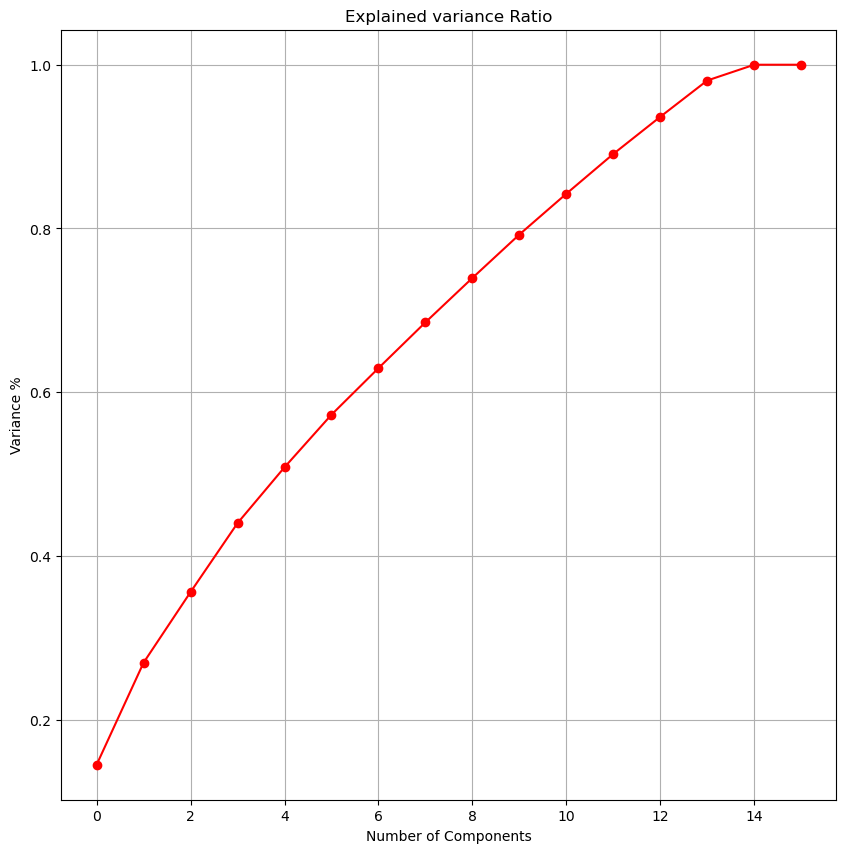

In [66]:
from sklearn.decomposition import PCA
pca = PCA()

x_pca = pca.fit_transform(x_scaled)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [67]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(x_scaled)
x_new

array([[-0.33995749,  2.08823119, -1.78574583, ..., -1.50761878,
         1.2533253 , -1.39042492],
       [ 0.23936002,  1.24196378, -0.70034905, ..., -0.13411606,
         1.61429229, -1.04805115],
       [ 1.35445982, -0.18544584,  0.6476606 , ..., -1.30841154,
         0.09296786, -1.46477924],
       ...,
       [-2.27978441, -1.29308276, -0.47415029, ...,  0.34337999,
         1.5286849 , -1.02940678],
       [-1.10709915,  1.71896085,  0.70678032, ...,  0.14973604,
         0.10006995,  1.18773421],
       [-0.21536706, -1.64305178, -0.41496031, ..., -0.49657012,
         1.33734629, -1.35680001]])

In [68]:
principle_x=pd.DataFrame(x_new,columns=np.arange(7))
principle_x

,0,1,2,3,4,5,6
0,-0.339957,2.088231,-1.785746,-0.244909,-1.507619,1.253325,-1.390425
1,0.239360,1.241964,-0.700349,-1.064311,-0.134116,1.614292,-1.048051
2,1.354460,-0.185446,0.647661,-1.519672,-1.308412,0.092968,-1.464779
3,1.737123,-0.332832,-1.488039,1.720979,-1.023389,-0.448496,-0.795169
4,0.083054,-0.357165,0.039193,1.344168,-0.574197,-1.159059,-0.786948
...,...,...,...,...,...,...,...
23638,-1.874759,-1.209401,-0.804392,-0.003068,-1.258162,-0.815342,-0.765620
23639,-3.216767,-1.663412,-0.519357,-0.723392,1.919803,-1.356739,1.567511
23640,-2.279784,-1.293083,-0.474150,0.457550,0.343380,1.528685,-1.029407
23641,-1.107099,1.718961,0.706780,-0.913225,0.149736,0.100070,1.187734


Checking for mullticollineary after applying for PCA

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6


# Model Building

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (16550, 7)
Training target vector size: (16550,)
Test feature matrix size: (7093, 7)
Test target vector size: (7093,)


Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,2500):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.20)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.08997549867064558 on Random_state 1206


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=1206, test_size=.20)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)

In [75]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False) 
r2 = r2_score(Y_test, y_pred)

In [76]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 0.15346579335303132
MSE: 0.07459254114104402
RMSE: 0.27311635092217385
R2: 0.08997549867064558


Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, test_size=0.2, random_state=42)

In [79]:
log_reg = LogisticRegression(class_weight = "balanced")
log_reg.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced')

In [80]:
log_r_y_pred = log_reg.predict(X_test)
log_r_y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [81]:
accuracy = accuracy_score(Y_test, log_r_y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(Y_test, log_r_y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(Y_test, log_r_y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.71
Confusion Matrix:
[[3081 1222]
 [ 137  289]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82      4303
           1       0.19      0.68      0.30       426

    accuracy                           0.71      4729
   macro avg       0.57      0.70      0.56      4729
weighted avg       0.89      0.71      0.77      4729



# Hyperparameter tuning for Logistic Regression

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Optimizer algorithms
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'tol': [1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
}

In [84]:
log_reg_hyper = LogisticRegression()

In [85]:
grid_search = GridSearchCV(log_reg_hyper, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga'],
                         'tol': [0.0001, 0.001, 0.01]},
             verbose=1)

In [86]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [87]:
log_r_y_pred_hyper = best_model.predict(X_test)

accuracy = accuracy_score(Y_test, log_r_y_pred_hyper)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix_hyper = confusion_matrix(Y_test, log_r_y_pred_hyper)
print("Confusion Matrix After Hyperparameter tuning:")
print(conf_matrix_hyper)

print("Best Hyperparameters:", best_params)
print("Classification Report:\n", classification_report(Y_test, log_r_y_pred_hyper))

Accuracy: 0.91
Confusion Matrix After Hyperparameter tuning:
[[4301    2]
 [ 421    5]]
Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      4303
           1       0.71      0.01      0.02       426

    accuracy                           0.91      4729
   macro avg       0.81      0.51      0.49      4729
weighted avg       0.89      0.91      0.87      4729



Decision tree

In [88]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, test_size=0.2, random_state=42)

In [90]:
dec_tree_gini = DecisionTreeClassifier(criterion="gini", max_depth=3, class_weight="balanced", random_state=42)
dec_tree_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=6, class_weight="balanced", random_state=42)

In [91]:
dec_tree_gini.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [92]:
dec_tree_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, random_state=42)

In [93]:
gini_y_pred = dec_tree_gini.predict(X_test)

In [94]:
entropy_y_pred = dec_tree_entropy.predict(X_test)

In [95]:
gini_accuracy = accuracy_score(Y_test, gini_y_pred)
print(f"Gini model Accuracy: {gini_accuracy * 100:.2f}%")
print()

gini_conf_matrix = confusion_matrix(Y_test, gini_y_pred)
print("Gini Confusion Matrix:")
print(gini_conf_matrix)
print()

entropy_accuracy = accuracy_score(Y_test, entropy_y_pred)
print(f"Entropy model Accuracy: {entropy_accuracy * 100:.2f}%")
print()

entropy_conf_matrix = confusion_matrix(Y_test, entropy_y_pred)
print("Entropy Confusion Matrix:")
print(entropy_conf_matrix)
print()

print("Gini model classification report : ")
print(classification_report(Y_test, gini_y_pred))
print()

print("Entropy model classification report : ")
print(classification_report(Y_test, entropy_y_pred))

Gini model Accuracy: 62.19%

Gini Confusion Matrix:
[[2645 1658]
 [ 130  296]]

Entropy model Accuracy: 64.33%

Entropy Confusion Matrix:
[[2742 1561]
 [ 126  300]]

Gini model classification report : 
              precision    recall  f1-score   support

           0       0.95      0.61      0.75      4303
           1       0.15      0.69      0.25       426

    accuracy                           0.62      4729
   macro avg       0.55      0.65      0.50      4729
weighted avg       0.88      0.62      0.70      4729


Entropy model classification report : 
              precision    recall  f1-score   support

           0       0.96      0.64      0.76      4303
           1       0.16      0.70      0.26       426

    accuracy                           0.64      4729
   macro avg       0.56      0.67      0.51      4729
weighted avg       0.88      0.64      0.72      4729



# Hyperparameter Tuning for Decision Tree Model

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid = {
    'max_depth': [2, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None]
}

In [99]:
dec_tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dec_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [100]:
grid_search.fit(X_train, Y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9152479719102953


Making best Decision tree model according to hyperparameters

In [101]:
best_dec_tree = DecisionTreeClassifier(max_depth=2, min_samples_split=2, min_samples_leaf=1, criterion='gini', class_weight=None, random_state=42)

In [102]:
best_dec_tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [103]:
dt_y_pred_hyper = best_dec_tree.predict(X_test)

In [104]:
accuracy = accuracy_score(Y_test, dt_y_pred_hyper)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print()

dt_conf_matrix_hyper = confusion_matrix(Y_test, dt_y_pred_hyper)
print("Confusion Matrix:")
print(dt_conf_matrix_hyper)
print()

print("Model classification report : ")
print(classification_report(Y_test, dt_y_pred_hyper))
print()

Model Accuracy: 90.99%

Confusion Matrix:
[[4303    0]
 [ 426    0]]

Model classification report : 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4303
           1       0.00      0.00      0.00       426

    accuracy                           0.91      4729
   macro avg       0.45      0.50      0.48      4729
weighted avg       0.83      0.91      0.87      4729




# XG Boost

In [105]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [106]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [107]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

In [108]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'eta': 0.1,
    'eval_metric': 'logloss',
    'scale_pos_weight': len(Y_train) / (2 * np.sum(Y_train == 1))  # Scale weight of positive class
}

In [109]:
# Train the model
num_round = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

In [110]:
# Make predictions
preds = bst.predict(dtest)
preds
# For binary classification
preds_binary = (preds > 0.5).astype(int)

In [114]:
accuracy = accuracy_score(Y_test, preds_binary)
print(f'Accuracy: {accuracy * 100:.2f}%')

xg_conf_matrix = confusion_matrix(Y_test, preds_binary)
print("Confusion Matrix:")
print(xg_conf_matrix)
print()

print("Model classification report : ")
print(classification_report(Y_test, preds_binary))
print()

Accuracy: 72.38%
Confusion Matrix:
[[3161 1142]
 [ 164  262]]

Model classification report : 
              precision    recall  f1-score   support

           0       0.95      0.73      0.83      4303
           1       0.19      0.62      0.29       426

    accuracy                           0.72      4729
   macro avg       0.57      0.67      0.56      4729
weighted avg       0.88      0.72      0.78      4729




In [112]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score

roc_auc = roc_auc_score(Y_test, preds_binary)
print(f'ROC-AUC: {roc_auc:.2f}')

pr_auc = average_precision_score(Y_test, preds_binary)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

ROC-AUC: 0.62
Precision-Recall AUC: 0.14


In [115]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score

# Resample the data using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

# Create DMatrix for resampled data
dtrain_resampled = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'eta': 0.1,
    'eval_metric': 'logloss',
    'scale_pos_weight': len(y_train_resampled) / (2 * np.sum(y_train_resampled == 1))
}

# Train the model
num_round = 100
bst = xgb.train(params, dtrain_resampled, num_round)

# Make predictions
preds = bst.predict(dtest)
preds_binary = (preds > 0.5).astype(int)

# Evaluate the model
xg_accuracy_hyper = accuracy_score(Y_test, preds_binary)
print(f'Accuracy: {xg_accuracy_hyper * 100:.2f}%')

xg_conf_matrix_hyper = confusion_matrix(Y_test, preds_binary)
print("Confusion Matrix:")
print(xg_conf_matrix_hyper)
print()

print(classification_report(Y_test, preds_binary))
roc_auc = roc_auc_score(Y_test, preds)
print(f'ROC-AUC: {roc_auc:.2f}')


Accuracy: 72.38%
Confusion Matrix:
[[3161 1142]
 [ 164  262]]

              precision    recall  f1-score   support

           0       0.95      0.73      0.83      4303
           1       0.19      0.62      0.29       426

    accuracy                           0.72      4729
   macro avg       0.57      0.67      0.56      4729
weighted avg       0.88      0.72      0.78      4729

ROC-AUC: 0.73
